<a href="https://colab.research.google.com/github/mengwangk/dl-projects/blob/master/04_04_auto_ml_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automated ML - Generate Data

In [0]:
COLAB = True

DATASET_NAME = '4D.zip'

FEATURE_DATASET_PREFIX = 'feature_matrix_d2'

In [2]:
if COLAB:
  !pip install -U featuretools
  # !sudo apt-get install git-lfs && git lfs install
  from google.colab import drive
  drive.mount('/content/gdrive')
  !rm -rf dl-projects
  !git clone https://github.com/mengwangk/dl-projects
  !cd dl-projects && ls

     |████████████████████████████████| 245kB 6.5MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
  Found existing installation: featuretools 0.4.1
    Uninstalling featuretools-0.4.1:
      Successfully uninstalled featuretools-0.4.1


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Cloning into 'dl-projects'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 878 (delta 61), reused 12 (delta 7), pack-reused 781
Receiving objects: 100% (878/878), 68.85 MiB | 22.25 MiB/s, done.
Resolving deltas: 100% (509/509), done.
01_01_tensor.ipynb	       04_02_auto_ml_5.ipynb  d03_train_dl.ipynb
01_02_correlation.ipynb        04_03_auto_ml_1.ipynb  d04_

In [0]:
if COLAB:
  !cp dl-projects/utils* .
  !cp dl-projects/preprocess* .

In [0]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import math 
import matplotlib
import re

from scipy import stats
from collections import Counter
from pathlib import Path

plt.style.use('fivethirtyeight')

sns.set(style="ticks")

# Automated feature engineering
import featuretools as ft

# Machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, MinMaxScaler, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from dateutil.relativedelta import relativedelta

from IPython.display import display

from utils import *
from preprocess import *

# The Answer to the Ultimate Question of Life, the Universe, and Everything.
np.random.seed(42)

In [6]:
%aimport

Modules to reload:
all-except-skipped

Modules to skip:



## Preparation

In [0]:
if COLAB:
  DATASET_PATH = Path("dl-projects/datasets")
else:
  DATASET_PATH = Path("datasets")

DATASET = DATASET_PATH/DATASET_NAME

In [0]:
data = format_tabular(DATASET)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106858 entries, 0 to 106857
Data columns (total 4 columns):
DrawNo       106858 non-null int64
DrawDate     106858 non-null datetime64[ns]
PrizeType    106858 non-null object
LuckyNo      106858 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [10]:
data.tail(24)

,DrawNo,DrawDate,PrizeType,LuckyNo
106834,505219,2019-12-29,SpecialNo9,2528
106835,505320,2020-01-01,1stPrizeNo,875
106836,505320,2020-01-01,2ndPrizeNo,6307
106837,505320,2020-01-01,3rdPrizeNo,8552
106838,505320,2020-01-01,ConsolationNo1,2114
106839,505320,2020-01-01,ConsolationNo10,4861
106840,505320,2020-01-01,ConsolationNo2,508
106841,505320,2020-01-01,ConsolationNo3,2086
106842,505320,2020-01-01,ConsolationNo4,3296
106843,505320,2020-01-01,ConsolationNo5,413


In [0]:
data['NumberId'] = data['LuckyNo']

In [12]:
data.tail(10)

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId
106848,505320,2020-01-01,SpecialNo1,2404,2404
106849,505320,2020-01-01,SpecialNo10,7382,7382
106850,505320,2020-01-01,SpecialNo2,2220,2220
106851,505320,2020-01-01,SpecialNo3,3573,3573
106852,505320,2020-01-01,SpecialNo4,4524,4524
106853,505320,2020-01-01,SpecialNo5,6856,6856
106854,505320,2020-01-01,SpecialNo6,8107,8107
106855,505320,2020-01-01,SpecialNo7,1026,1026
106856,505320,2020-01-01,SpecialNo8,3960,3960
106857,505320,2020-01-01,SpecialNo9,5472,5472


## Data Cleansing

In [0]:
def change_prize_type(x):
  if "Special" in x:
    return 'Special'
  elif "Consolation" in x:
    return 'Consolation'
  else:
    return x

def increment_draw_date(x):
  x = x + relativedelta(minutes=1)
  return x

data['PrizeType'] = data['PrizeType'].apply(change_prize_type)

# Add 1 minutes to draw date to avoid overlapping with the cut off date
data['DrawDate'] = data['DrawDate'].apply(increment_draw_date)

In [14]:
data.tail(23)

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId
106835,505320,2020-01-01 00:01:00,1stPrizeNo,875,875
106836,505320,2020-01-01 00:01:00,2ndPrizeNo,6307,6307
106837,505320,2020-01-01 00:01:00,3rdPrizeNo,8552,8552
106838,505320,2020-01-01 00:01:00,Consolation,2114,2114
106839,505320,2020-01-01 00:01:00,Consolation,4861,4861
106840,505320,2020-01-01 00:01:00,Consolation,508,508
106841,505320,2020-01-01 00:01:00,Consolation,2086,2086
106842,505320,2020-01-01 00:01:00,Consolation,3296,3296
106843,505320,2020-01-01 00:01:00,Consolation,413,413
106844,505320,2020-01-01 00:01:00,Consolation,4781,4781


In [15]:
data.describe().round(2)

,DrawNo,LuckyNo,NumberId
count,106858.00,106858.00,106858.00
mean,273049.89,4973.57,4973.57
std,134131.48,2885.58,2885.58
min,40792.00,0.00,0.00
25%,156899.00,2462.00,2462.00
50%,273056.00,4951.00,4951.00
75%,389213.00,7463.00,7463.00
max,505320.00,9999.00,9999.00


Text(0.5, 1.0, 'Draw')

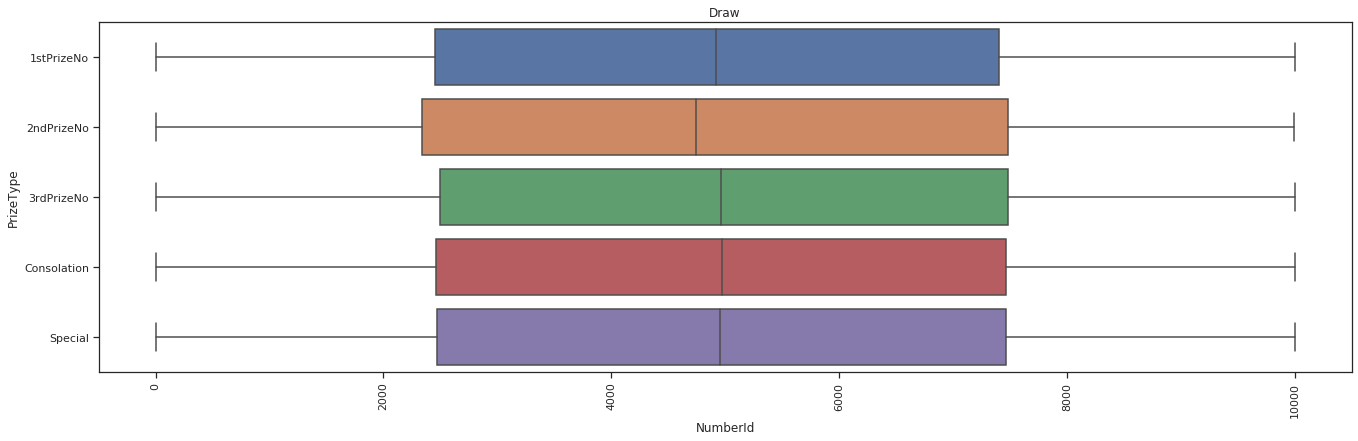

In [17]:
plt.figure(figsize=(20,6))
sns.boxplot(x='NumberId', y='PrizeType',data=data)
plt.xticks(rotation=90)
plt.title('Draw')

# print(data[data['NumberId']==1760])

## Exploration

In [0]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

## Making Labels

In [19]:
data['TotalStrike'] = 1
data.head(10)

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
0,40792,1992-05-06 00:01:00,1stPrizeNo,19,19,1
1,40792,1992-05-06 00:01:00,2ndPrizeNo,1124,1124,1
2,40792,1992-05-06 00:01:00,3rdPrizeNo,592,592,1
3,40792,1992-05-06 00:01:00,Consolation,5311,5311,1
4,40792,1992-05-06 00:01:00,Consolation,407,407,1
5,40792,1992-05-06 00:01:00,Consolation,1949,1949,1
6,40792,1992-05-06 00:01:00,Consolation,1606,1606,1
7,40792,1992-05-06 00:01:00,Consolation,3775,3775,1
8,40792,1992-05-06 00:01:00,Consolation,6226,6226,1
9,40792,1992-05-06 00:01:00,Consolation,1271,1271,1


In [0]:
def make_cutoffs(start_date, end_date, threshold=0):
    # Find numbers exist before start date
    number_pool = data[data['DrawDate'] < start_date]['NumberId'].unique()
    tmp = pd.DataFrame({'NumberId': number_pool})
   
    # For numbers in the number pool, find their strike count between the start and end dates
    strike_counts = data[(data['NumberId'].isin(number_pool)) & 
        (data['DrawDate'] >= start_date) & 
        (data['DrawDate']< end_date)
    ].groupby('NumberId')['TotalStrike'].count().reset_index()
    
    number_of_draws = data[
                 (data['DrawDate'] >= start_date) & 
                 (data['DrawDate']< end_date)]['DrawDate'].nunique()
    # display(strike_counts)
    # print(number_of_draws)
    
    # Merge with all the number ids to record all customers who existed before start date
    strike_counts = strike_counts.merge(tmp, on='NumberId', how='right')
    
    # Set the total for any numbers who did not strike in the timeframe equal to 0
    strike_counts['TotalStrike'] = strike_counts['TotalStrike'].fillna(0)
    
    # Label is based on the threshold
    strike_counts['Label'] = (strike_counts['TotalStrike'] > threshold).astype(int)
        
    # The cutoff time is the start date
    strike_counts['cutoff_time'] = pd.to_datetime(start_date)
    strike_counts = strike_counts[['NumberId', 'cutoff_time', 'TotalStrike', 'Label']]
    
    #display(strike_counts[strike_counts['Label']==1].nunique())
    #display(strike_counts.sort_values(by='TotalStrike', ascending=False))
   
    return number_of_draws, strike_counts

In [30]:
number_of_draws, dec_2019 = make_cutoffs(pd.datetime(2019, 12, 1), pd.datetime(2020, 1, 1))
dec_2019[(dec_2019['Label']==1) & (dec_2019['TotalStrike']==2)].sort_values(by='TotalStrike', ascending=False).head()

,NumberId,cutoff_time,TotalStrike,Label
3,135,2019-12-01,2.0,1
86,2513,2019-12-01,2.0,1
167,5030,2019-12-01,2.0,1
189,5740,2019-12-01,2.0,1
192,5864,2019-12-01,2.0,1


In [29]:
data[data['NumberId'].isin([135,2513])]

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
6255,67894,1994-01-27 00:01:00,Special,2513,2513,1
9126,80394,1994-11-13 00:01:00,Special,2513,2513,1
11857,92295,1995-08-19 00:01:00,Consolation,2513,2513,1
16285,111596,1996-11-10 00:01:00,2ndPrizeNo,2513,2513,1
19202,124197,1997-08-31 00:01:00,Special,135,135,1
46671,243705,2005-01-04 00:01:00,Consolation,2513,2513,1
50329,259605,2005-12-10 00:01:00,Consolation,2513,2513,1
61894,309908,2008-12-10 00:01:00,2ndPrizeNo,2513,2513,1
64702,322109,2009-08-26 00:01:00,Consolation,135,135,1
66047,327909,2009-12-23 00:01:00,Special,2513,2513,1


Text(0.5, 1.0, 'Label Distribution for May')

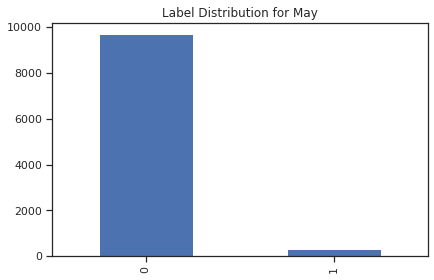

In [32]:
dec_2019['Label'].value_counts().plot.bar()
plt.title('Label Distribution for May')

In [0]:
CUT_OFF_YEAR=pd.datetime(2012, 1, 1)

In [34]:
## Loop through each month starting from CUT_OFF_YEAR

# print(data['DrawDate'].max())
max_year_month = data['DrawDate'].max() - relativedelta(months=1) + relativedelta(day=31)
print(f"Max month year: {max_year_month}")

start_year_month = CUT_OFF_YEAR

months_data = []
total_draws = 0
while start_year_month < max_year_month:
    start_date = start_year_month 
    end_date = start_date + relativedelta(months=1)
    start_year_month = start_year_month + relativedelta(months=1)
    print(f"Labels from {start_date} to {end_date}")
    draw_count, month_data = make_cutoffs(start_date, end_date)
    total_draws = total_draws + draw_count
    months_data.append(month_data)

print(f"Total draws: {total_draws}")
print(f"Total draws: {data[(data['DrawDate'] >= CUT_OFF_YEAR) & (data['DrawDate'] <= max_year_month)]['DrawDate'].nunique()}")
print(f"Total months:{len(months_data)}")
print(f"Total records count: {sum([len(l) for l in months_data])}")
print([len(l) for l in months_data])

Max month year: 2019-12-31 00:01:00
Labels from 2012-01-01 00:00:00 to 2012-02-01 00:00:00
Labels from 2012-02-01 00:00:00 to 2012-03-01 00:00:00
Labels from 2012-03-01 00:00:00 to 2012-04-01 00:00:00
Labels from 2012-04-01 00:00:00 to 2012-05-01 00:00:00
Labels from 2012-05-01 00:00:00 to 2012-06-01 00:00:00
Labels from 2012-06-01 00:00:00 to 2012-07-01 00:00:00
Labels from 2012-07-01 00:00:00 to 2012-08-01 00:00:00
Labels from 2012-08-01 00:00:00 to 2012-09-01 00:00:00
Labels from 2012-09-01 00:00:00 to 2012-10-01 00:00:00
Labels from 2012-10-01 00:00:00 to 2012-11-01 00:00:00
Labels from 2012-11-01 00:00:00 to 2012-12-01 00:00:00
Labels from 2012-12-01 00:00:00 to 2013-01-01 00:00:00
Labels from 2013-01-01 00:00:00 to 2013-02-01 00:00:00
Labels from 2013-02-01 00:00:00 to 2013-03-01 00:00:00
Labels from 2013-03-01 00:00:00 to 2013-04-01 00:00:00
Labels from 2013-04-01 00:00:00 to 2013-05-01 00:00:00
Labels from 2013-05-01 00:00:00 to 2013-06-01 00:00:00
Labels from 2013-06-01 00:00:

In [35]:
labels = pd.concat(months_data)
labels.to_csv(DATASET_PATH/'labels.csv')
labels.describe()

,NumberId,TotalStrike,Label
count,959893.000000,959893.000000,959893.000000
mean,4999.183099,0.033948,0.033393
std,2886.681334,0.184152,0.179661
min,0.000000,0.000000,0.000000
25%,2499.000000,0.000000,0.000000
50%,4999.000000,0.000000,0.000000
75%,7499.000000,0.000000,0.000000
max,9999.000000,3.000000,1.000000


In [36]:
labels[(labels['NumberId'] == 9016)  & (labels['Label'] > 0)]

,NumberId,cutoff_time,TotalStrike,Label
307,9016,2014-10-01,1.0,1
305,9016,2016-05-01,1.0,1


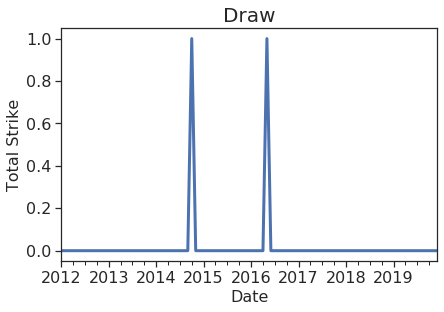

In [37]:
labels.loc[labels['NumberId'] == 9016].set_index('cutoff_time')['TotalStrike'].plot(figsize = (6, 4), linewidth = 3)
plt.xlabel('Date', size = 16); 
plt.ylabel('Total Strike', size = 16); 
plt.title('Draw', size = 20);
plt.xticks(size = 16); plt.yticks(size = 16);

In [38]:
labels.tail(10)

,NumberId,cutoff_time,TotalStrike,Label
9990,4949,2019-12-01,0.0,0
9991,3479,2019-12-01,0.0,0
9992,6512,2019-12-01,0.0,0
9993,4996,2019-12-01,0.0,0
9994,3852,2019-12-01,0.0,0
9995,7940,2019-12-01,0.0,0
9996,5407,2019-12-01,0.0,0
9997,7709,2019-12-01,0.0,0
9998,9659,2019-12-01,0.0,0
9999,5488,2019-12-01,0.0,0


## Automated Feature Engineering

In [39]:
es = ft.EntitySet(id="Lotto Results")

# Add the entire data table as an entity
es.entity_from_dataframe("Results",
                         dataframe=data,
                         index="results_index",
                         time_index = 'DrawDate')

es['Results']

2020-01-05 13:01:06,415 featuretools.entityset - WARNING    index results_index not found in dataframe, creating new integer column


Entity: Results
  Variables:
    results_index (dtype: index)
    DrawNo (dtype: numeric)
    DrawDate (dtype: datetime_time_index)
    PrizeType (dtype: categorical)
    LuckyNo (dtype: numeric)
    NumberId (dtype: numeric)
    TotalStrike (dtype: numeric)
  Shape:
    (Rows: 106858, Columns: 7)

In [40]:
es.normalize_entity(new_entity_id="Numbers",
                    base_entity_id="Results",
                    index="NumberId",
                    )

Entityset: Lotto Results
  Entities:
    Results [Rows: 106858, Columns: 7]
    Numbers [Rows: 10000, Columns: 2]
  Relationships:
    Results.NumberId -> Numbers.NumberId

In [41]:
es

Entityset: Lotto Results
  Entities:
    Results [Rows: 106858, Columns: 7]
    Numbers [Rows: 10000, Columns: 2]
  Relationships:
    Results.NumberId -> Numbers.NumberId

In [42]:
es['Numbers'].df.head(24)

,NumberId,first_Results_time
19,19,1992-05-06 00:01:00
1124,1124,1992-05-06 00:01:00
592,592,1992-05-06 00:01:00
5311,5311,1992-05-06 00:01:00
407,407,1992-05-06 00:01:00
1949,1949,1992-05-06 00:01:00
1606,1606,1992-05-06 00:01:00
3775,3775,1992-05-06 00:01:00
6226,6226,1992-05-06 00:01:00
1271,1271,1992-05-06 00:01:00


In [43]:
es['Results'].df.head(24)

,results_index,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
0,0,40792,1992-05-06 00:01:00,1stPrizeNo,19,19,1
1,1,40792,1992-05-06 00:01:00,2ndPrizeNo,1124,1124,1
2,2,40792,1992-05-06 00:01:00,3rdPrizeNo,592,592,1
3,3,40792,1992-05-06 00:01:00,Consolation,5311,5311,1
4,4,40792,1992-05-06 00:01:00,Consolation,407,407,1
5,5,40792,1992-05-06 00:01:00,Consolation,1949,1949,1
6,6,40792,1992-05-06 00:01:00,Consolation,1606,1606,1
7,7,40792,1992-05-06 00:01:00,Consolation,3775,3775,1
8,8,40792,1992-05-06 00:01:00,Consolation,6226,6226,1
9,9,40792,1992-05-06 00:01:00,Consolation,1271,1271,1


In [45]:
len(es['Results'].df)

106858

## Deep Feature Synthesis

In [46]:
feature_matrix, feature_names = ft.dfs(entityset=es, target_entity='Numbers',
                                        cutoff_time = labels, verbose = 2,
                                        cutoff_time_in_index = True,
                                        chunk_size = len(labels), n_jobs = 1,
                                        max_depth = 1)

Built 25 features
Elapsed: 17:08 | Progress: 100%|██████████


In [0]:
# default_agg_primitives =  ['std', 'max', 'min', 'mode', 'mean', 'skew', 'last', 'avg_time_between', 
#                             'count', 'sum', 'trend', 'percent_true', 'num_unique']
# default_trans_primitives =  ['cum_sum', 'cum_mean', 'day', 'month', 'hour', 'percentile', 'and', 'time_since']

# feature_matrix, feature_names = ft.dfs(entityset=es, target_entity='Numbers',
#                                        agg_primitives = default_agg_primitives ,
#                                        trans_primitives = default_trans_primitives,
#                                        cutoff_time = labels, verbose = 1,
#                                        cutoff_time_in_index = True,
#                                        chunk_size = len(labels), n_jobs = 1,
#                                        max_depth = 2)

In [47]:
len(feature_matrix.columns), feature_matrix.columns

(27, Index(['SUM(Results.DrawNo)', 'SUM(Results.LuckyNo)',
        'SUM(Results.TotalStrike)', 'STD(Results.DrawNo)',
        'STD(Results.LuckyNo)', 'STD(Results.TotalStrike)',
        'MAX(Results.DrawNo)', 'MAX(Results.LuckyNo)',
        'MAX(Results.TotalStrike)', 'SKEW(Results.DrawNo)',
        'SKEW(Results.LuckyNo)', 'SKEW(Results.TotalStrike)',
        'MIN(Results.DrawNo)', 'MIN(Results.LuckyNo)',
        'MIN(Results.TotalStrike)', 'MEAN(Results.DrawNo)',
        'MEAN(Results.LuckyNo)', 'MEAN(Results.TotalStrike)', 'COUNT(Results)',
        'NUM_UNIQUE(Results.PrizeType)', 'MODE(Results.PrizeType)',
        'DAY(first_Results_time)', 'YEAR(first_Results_time)',
        'MONTH(first_Results_time)', 'WEEKDAY(first_Results_time)',
        'TotalStrike', 'Label'],
       dtype='object'))

In [48]:
len(feature_matrix)

959893

In [49]:
feature_matrix.head().T

NumberId,72,98,121,166,192
time,2012-01-01,2012-01-01,2012-01-01,2012-01-01,2012-01-01
SUM(Results.DrawNo),865011,1426004,1392621,1752222,1029621
SUM(Results.LuckyNo),288,784,726,1328,768
SUM(Results.TotalStrike),4,8,6,8,4
STD(Results.DrawNo),75380.4,111281,60627.5,104465,87114.8
STD(Results.LuckyNo),0,0,0,0,0
STD(Results.TotalStrike),0,0,0,0,0
MAX(Results.DrawNo),318809,328109,288507,362311,338210
MAX(Results.LuckyNo),72,98,121,166,192
MAX(Results.TotalStrike),1,1,1,1,1


In [50]:
feature_matrix.shape

(959893, 27)

In [51]:
feature_matrix.head(2)

,,SUM(Results.DrawNo),SUM(Results.LuckyNo),SUM(Results.TotalStrike),STD(Results.DrawNo),STD(Results.LuckyNo),STD(Results.TotalStrike),MAX(Results.DrawNo),MAX(Results.LuckyNo),MAX(Results.TotalStrike),SKEW(Results.DrawNo),SKEW(Results.LuckyNo),SKEW(Results.TotalStrike),MIN(Results.DrawNo),MIN(Results.LuckyNo),MIN(Results.TotalStrike),MEAN(Results.DrawNo),MEAN(Results.LuckyNo),MEAN(Results.TotalStrike),COUNT(Results),NUM_UNIQUE(Results.PrizeType),MODE(Results.PrizeType),DAY(first_Results_time),YEAR(first_Results_time),MONTH(first_Results_time),WEEKDAY(first_Results_time),TotalStrike,Label
NumberId,time,,,,,,,,,,,,,,,,,,,,,,,,,,,
72,2012-01-01,865011,288,4,75380.359429,0.0,0.0,318809,72,1,0.910970,0.0,0.0,137498,72,1,216252.75,72,1,4,1,Consolation,8,1998,7,2,1.0,1
98,2012-01-01,1426004,784,8,111281.080099,0.0,0.0,328109,98,1,-0.071903,0.0,0.0,42692,98,1,178250.50,98,1,8,2,Consolation,18,1992,6,3,1.0,1


In [0]:
#feature_matrix[(feature_matrix['NumberId']==0) & (feature_matrix['Label']==1)].head(10)

## Correlations

In [53]:
# Save the original feature matrix
origin_feature_matrix = feature_matrix

feature_matrix = pd.get_dummies(feature_matrix).reset_index()
feature_matrix.shape

(959893, 33)

In [54]:
feature_matrix.head(10)

,NumberId,time,SUM(Results.DrawNo),SUM(Results.LuckyNo),SUM(Results.TotalStrike),STD(Results.DrawNo),STD(Results.LuckyNo),STD(Results.TotalStrike),MAX(Results.DrawNo),MAX(Results.LuckyNo),MAX(Results.TotalStrike),SKEW(Results.DrawNo),SKEW(Results.LuckyNo),SKEW(Results.TotalStrike),MIN(Results.DrawNo),MIN(Results.LuckyNo),MIN(Results.TotalStrike),MEAN(Results.DrawNo),MEAN(Results.LuckyNo),MEAN(Results.TotalStrike),COUNT(Results),NUM_UNIQUE(Results.PrizeType),DAY(first_Results_time),YEAR(first_Results_time),MONTH(first_Results_time),WEEKDAY(first_Results_time),TotalStrike,Label,MODE(Results.PrizeType)_1stPrizeNo,MODE(Results.PrizeType)_2ndPrizeNo,MODE(Results.PrizeType)_3rdPrizeNo,MODE(Results.PrizeType)_Consolation,MODE(Results.PrizeType)_Special
0,72,2012-01-01,865011,288,4,75380.359429,0.0,0.0,318809,72,1,0.910970,0.0,0.0,137498,72,1,216252.750,72,1,4,1,8,1998,7,2,1.0,1,0,0,0,1,0
1,98,2012-01-01,1426004,784,8,111281.080099,0.0,0.0,328109,98,1,-0.071903,0.0,0.0,42692,98,1,178250.500,98,1,8,2,18,1992,6,3,1.0,1,0,0,0,1,0
2,121,2012-01-01,1392621,726,6,60627.517299,0.0,0.0,288507,121,1,-0.742656,0.0,0.0,141698,121,1,232103.500,121,1,6,3,11,1998,10,6,1.0,1,0,0,0,0,1
3,166,2012-01-01,1752222,1328,8,104465.138948,0.0,0.0,362311,166,1,-0.552413,0.0,0.0,43492,166,1,219027.750,166,1,8,2,8,1992,7,2,1.0,1,0,0,0,1,0
4,192,2012-01-01,1029621,768,4,87114.830890,0.0,0.0,338210,192,1,-0.999495,0.0,0.0,139798,192,1,257405.250,192,1,4,2,30,1998,8,6,1.0,1,0,0,0,0,1
5,249,2012-01-01,1299326,1245,5,97675.103571,0.0,0.0,338110,249,1,-1.580294,0.0,0.0,97495,249,1,259865.200,249,1,5,2,17,1995,12,6,1.0,1,0,0,0,0,1
6,276,2012-01-01,775405,1104,4,115476.100042,0.0,0.0,340210,276,1,0.512307,0.0,0.0,71594,276,1,193851.250,276,1,4,2,24,1994,4,6,2.0,1,0,0,0,0,1
7,285,2012-01-01,1174018,1425,5,139073.521638,0.0,0.0,361611,285,1,-0.629746,0.0,0.0,57593,285,1,234803.600,285,1,5,4,2,1993,6,2,1.0,1,1,0,0,0,0
8,290,2012-01-01,1153687,2320,8,63077.284556,0.0,0.0,235004,290,1,-0.102804,0.0,0.0,45792,290,1,144210.875,290,1,8,2,30,1992,8,6,1.0,1,0,0,0,0,1
9,346,2012-01-01,887802,1730,5,116098.654343,0.0,0.0,356111,346,1,0.896164,0.0,0.0,47092,346,1,177560.400,346,1,5,3,30,1992,9,2,1.0,1,0,0,0,0,1


In [55]:
corrs = feature_matrix.corr().sort_values('TotalStrike')
corrs['TotalStrike'].head()

NumberId                -0.002580
MAX(Results.LuckyNo)    -0.002580
MEAN(Results.LuckyNo)   -0.002580
MIN(Results.LuckyNo)    -0.002580
STD(Results.DrawNo)     -0.002447
Name: TotalStrike, dtype: float64

In [56]:
corrs['TotalStrike'].dropna().tail(60)

NumberId                              -0.002580
MAX(Results.LuckyNo)                  -0.002580
MEAN(Results.LuckyNo)                 -0.002580
MIN(Results.LuckyNo)                  -0.002580
STD(Results.DrawNo)                   -0.002447
SUM(Results.LuckyNo)                  -0.002294
MODE(Results.PrizeType)_3rdPrizeNo    -0.002260
MAX(Results.DrawNo)                   -0.002173
MODE(Results.PrizeType)_2ndPrizeNo    -0.000766
SKEW(Results.DrawNo)                  -0.000760
COUNT(Results)                        -0.000593
SUM(Results.TotalStrike)              -0.000593
SUM(Results.DrawNo)                   -0.000563
MODE(Results.PrizeType)_1stPrizeNo    -0.000556
WEEKDAY(first_Results_time)           -0.000357
DAY(first_Results_time)               -0.000340
NUM_UNIQUE(Results.PrizeType)         -0.000236
MODE(Results.PrizeType)_Consolation   -0.000179
MEAN(Results.DrawNo)                  -0.000114
MODE(Results.PrizeType)_Special        0.000777
MONTH(first_Results_time)              0

In [0]:
feature_matrix['month'] = feature_matrix['time'].dt.month
feature_matrix['year'] = feature_matrix['time'].dt.year

In [58]:
feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959893 entries, 0 to 959892
Data columns (total 35 columns):
NumberId                               959893 non-null int64
time                                   959893 non-null datetime64[ns]
SUM(Results.DrawNo)                    959893 non-null int64
SUM(Results.LuckyNo)                   959893 non-null int64
SUM(Results.TotalStrike)               959893 non-null int64
STD(Results.DrawNo)                    958948 non-null float64
STD(Results.LuckyNo)                   958948 non-null float64
STD(Results.TotalStrike)               958948 non-null float64
MAX(Results.DrawNo)                    959893 non-null int64
MAX(Results.LuckyNo)                   959893 non-null int64
MAX(Results.TotalStrike)               959893 non-null int64
SKEW(Results.DrawNo)                   952257 non-null float64
SKEW(Results.LuckyNo)                  952257 non-null float64
SKEW(Results.TotalStrike)              952257 non-null float64
MIN(Results.Dr

In [59]:
feature_matrix.head()

,NumberId,time,SUM(Results.DrawNo),SUM(Results.LuckyNo),SUM(Results.TotalStrike),STD(Results.DrawNo),STD(Results.LuckyNo),STD(Results.TotalStrike),MAX(Results.DrawNo),MAX(Results.LuckyNo),MAX(Results.TotalStrike),SKEW(Results.DrawNo),SKEW(Results.LuckyNo),SKEW(Results.TotalStrike),MIN(Results.DrawNo),MIN(Results.LuckyNo),MIN(Results.TotalStrike),MEAN(Results.DrawNo),MEAN(Results.LuckyNo),MEAN(Results.TotalStrike),COUNT(Results),NUM_UNIQUE(Results.PrizeType),DAY(first_Results_time),YEAR(first_Results_time),MONTH(first_Results_time),WEEKDAY(first_Results_time),TotalStrike,Label,MODE(Results.PrizeType)_1stPrizeNo,MODE(Results.PrizeType)_2ndPrizeNo,MODE(Results.PrizeType)_3rdPrizeNo,MODE(Results.PrizeType)_Consolation,MODE(Results.PrizeType)_Special,month,year
0,72,2012-01-01,865011,288,4,75380.359429,0.0,0.0,318809,72,1,0.910970,0.0,0.0,137498,72,1,216252.75,72,1,4,1,8,1998,7,2,1.0,1,0,0,0,1,0,1,2012
1,98,2012-01-01,1426004,784,8,111281.080099,0.0,0.0,328109,98,1,-0.071903,0.0,0.0,42692,98,1,178250.50,98,1,8,2,18,1992,6,3,1.0,1,0,0,0,1,0,1,2012
2,121,2012-01-01,1392621,726,6,60627.517299,0.0,0.0,288507,121,1,-0.742656,0.0,0.0,141698,121,1,232103.50,121,1,6,3,11,1998,10,6,1.0,1,0,0,0,0,1,1,2012
3,166,2012-01-01,1752222,1328,8,104465.138948,0.0,0.0,362311,166,1,-0.552413,0.0,0.0,43492,166,1,219027.75,166,1,8,2,8,1992,7,2,1.0,1,0,0,0,1,0,1,2012
4,192,2012-01-01,1029621,768,4,87114.830890,0.0,0.0,338210,192,1,-0.999495,0.0,0.0,139798,192,1,257405.25,192,1,4,2,30,1998,8,6,1.0,1,0,0,0,0,1,1,2012


In [60]:
feature_matrix.tail()

,NumberId,time,SUM(Results.DrawNo),SUM(Results.LuckyNo),SUM(Results.TotalStrike),STD(Results.DrawNo),STD(Results.LuckyNo),STD(Results.TotalStrike),MAX(Results.DrawNo),MAX(Results.LuckyNo),MAX(Results.TotalStrike),SKEW(Results.DrawNo),SKEW(Results.LuckyNo),SKEW(Results.TotalStrike),MIN(Results.DrawNo),MIN(Results.LuckyNo),MIN(Results.TotalStrike),MEAN(Results.DrawNo),MEAN(Results.LuckyNo),MEAN(Results.TotalStrike),COUNT(Results),NUM_UNIQUE(Results.PrizeType),DAY(first_Results_time),YEAR(first_Results_time),MONTH(first_Results_time),WEEKDAY(first_Results_time),TotalStrike,Label,MODE(Results.PrizeType)_1stPrizeNo,MODE(Results.PrizeType)_2ndPrizeNo,MODE(Results.PrizeType)_3rdPrizeNo,MODE(Results.PrizeType)_Consolation,MODE(Results.PrizeType)_Special,month,year
959888,7940,2019-12-01,2399881,47640,6,43816.929073,0.0,0.0,473918,7940,1,1.185862,0.0,0.0,358611,7940,1,399980.166667,7940,1,6,2,24,2011,9,5,0.0,0,0,0,0,0,1,12,2019
959889,5407,2019-12-01,1215242,16221,3,33816.271769,0.0,0.0,426715,5407,1,-1.700598,0.0,0.0,366112,5407,1,405080.666667,5407,1,3,2,19,2012,2,6,0.0,0,0,0,0,0,1,12,2019
959890,7709,2019-12-01,3509524,61672,8,39368.855047,0.0,0.0,501619,7709,1,0.112795,0.0,0.0,373212,7709,1,438690.500000,7709,1,8,3,15,2012,7,6,0.0,0,0,0,0,1,0,12,2019
959891,9659,2019-12-01,2763600,57954,6,30474.905355,0.0,0.0,488518,9659,1,-0.788556,0.0,0.0,414714,9659,1,460600.000000,9659,1,6,3,12,2014,11,2,0.0,0,0,0,0,1,0,12,2019
959892,5488,2019-12-01,1310047,16464,3,20385.543930,0.0,0.0,460217,5488,1,1.729050,0.0,0.0,424515,5488,1,436682.333333,5488,1,3,3,27,2015,5,2,0.0,0,1,0,0,0,0,12,2019


In [61]:
display(feature_matrix.describe())

,NumberId,SUM(Results.DrawNo),SUM(Results.LuckyNo),SUM(Results.TotalStrike),STD(Results.DrawNo),STD(Results.LuckyNo),STD(Results.TotalStrike),MAX(Results.DrawNo),MAX(Results.LuckyNo),MAX(Results.TotalStrike),SKEW(Results.DrawNo),SKEW(Results.LuckyNo),SKEW(Results.TotalStrike),MIN(Results.DrawNo),MIN(Results.LuckyNo),MIN(Results.TotalStrike),MEAN(Results.DrawNo),MEAN(Results.LuckyNo),MEAN(Results.TotalStrike),COUNT(Results),NUM_UNIQUE(Results.PrizeType),DAY(first_Results_time),YEAR(first_Results_time),MONTH(first_Results_time),WEEKDAY(first_Results_time),TotalStrike,Label,MODE(Results.PrizeType)_1stPrizeNo,MODE(Results.PrizeType)_2ndPrizeNo,MODE(Results.PrizeType)_3rdPrizeNo,MODE(Results.PrizeType)_Consolation,MODE(Results.PrizeType)_Special,month,year
count,959893.000000,9.598930e+05,959893.000000,959893.000000,958948.000000,958948.0,958948.0,959893.000000,959893.000000,959893.0,952257.000000,952257.0,952257.0,959893.000000,959893.000000,959893.0,959893.000000,959893.000000,959893.0,959893.000000,959893.000000,959893.000000,959893.000000,959893.000000,959893.000000,959893.000000,959893.000000,959893.000000,959893.000000,959893.000000,959893.000000,959893.000000,959893.000000,959893.000000
mean,4999.183099,2.168381e+06,45042.829158,9.049760,111342.196139,0.0,0.0,390906.910112,4999.183099,1.0,-0.001558,0.0,0.0,83952.251200,4999.183099,1.0,237399.507951,4999.183099,1.0,9.049760,2.931634,15.660883,1994.573834,6.671245,3.907498,0.033948,0.033393,0.009405,0.005935,0.006609,0.553602,0.424448,6.500063,2015.500291
std,2886.681334,9.048781e+05,31606.208460,3.162728,25772.649041,0.0,0.0,59335.796149,2886.681334,0.0,0.659651,0.0,0.0,42863.890866,2886.681334,0.0,45425.902515,2886.681334,0.0,3.162728,0.842726,8.806776,2.718539,3.370727,1.738196,0.184152,0.179661,0.096523,0.076810,0.081027,0.497119,0.494259,3.452057,2.291231
min,0.000000,4.399200e+04,0.000000,1.000000,70.710678,0.0,0.0,43992.000000,0.000000,1.0,-2.620416,0.0,0.0,40792.000000,0.000000,1.0,43992.000000,0.000000,1.0,1.000000,1.000000,1.000000,1992.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000
25%,2499.000000,1.513109e+06,19496.000000,7.000000,95435.722356,0.0,0.0,355511.000000,2499.000000,1.0,-0.394812,0.0,0.0,53293.000000,2499.000000,1.0,207002.000000,2499.000000,1.0,7.000000,2.000000,8.000000,1993.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2014.000000
50%,4999.000000,2.069220e+06,39802.000000,9.000000,111816.307866,0.0,0.0,394313.000000,4999.000000,1.0,-0.003531,0.0,0.0,70794.000000,4999.000000,1.0,236360.857143,4999.000000,1.0,9.000000,3.000000,16.000000,1994.000000,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000,2016.000000
75%,7499.000000,2.724341e+06,65058.000000,11.000000,128452.562223,0.0,0.0,435016.000000,7499.000000,1.0,0.398242,0.0,0.0,100596.000000,7499.000000,1.0,267205.900000,7499.000000,1.0,11.000000,3.000000,23.000000,1996.000000,10.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000,2018.000000
max,9999.000000,7.854810e+06,219975.000000,27.000000,261432.933354,0.0,0.0,503819.000000,9999.000000,1.0,2.663055,0.0,0.0,424515.000000,9999.000000,1.0,460600.000000,9999.000000,1.0,27.000000,5.000000,31.000000,2015.000000,12.000000,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,2019.000000


## Save feature matrix

In [0]:
# https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166
if COLAB:
  #!cd dl-projects && git config --global user.email 'mengwangk@gmail.com' 
  #!cd dl-projects && git config --global user.name 'mengwangk'
  #!cd dl-projects && git add -A && git commit -m 'Updated from colab' 
  # from google.colab import drive
  # drive.mount('/content/gdrive')
  GDRIVE_DATASET_FOLDER = Path('gdrive/My Drive/datasets/')
  #!ls /content/gdrive/My\ Drive/
  
  # feature_matrix.to_csv(GDRIVE_DATASET_FOLDER/f"{FEATURE_DATASET_PREFIX}.csv", index=False)
  feature_matrix.to_pickle(GDRIVE_DATASET_FOLDER/f"{FEATURE_DATASET_PREFIX}.pkl")
  origin_feature_matrix.to_pickle(GDRIVE_DATASET_FOLDER/f"{FEATURE_DATASET_PREFIX}_origin.pkl")

In [0]:
#if COLAB:
#  !cd dl-projects && git remote rm origin && git remote add origin https://mengwangk:XX@github.com/mengwangk/dl-projects.git && git push -u origin master

In [0]:
# from google.colab import files
# files.download(DATASET_PATH/'feature_matrix.csv') 

In [65]:
if COLAB:
  !cd gdrive/"My Drive"/datasets/ && ls -l --block-size=M

total 579M
-rw------- 1 root root 160M Jan  5 13:19 feature_matrix_d2_v1.csv
-rw------- 1 root root 196M Jan  5 13:19 feature_matrix_d2_v1_origin.pkl
-rw------- 1 root root 225M Jan  5 13:19 feature_matrix_d2_v1.pkl


## Validation

#### Oct 2019

In [67]:
month_data = feature_matrix.loc[feature_matrix['time'] == pd.datetime(2019,10,1)]
len(month_data), month_data.columns

(10000,
 Index(['NumberId', 'time', 'SUM(Results.DrawNo)', 'SUM(Results.LuckyNo)',
        'SUM(Results.TotalStrike)', 'STD(Results.DrawNo)',
        'STD(Results.LuckyNo)', 'STD(Results.TotalStrike)',
        'MAX(Results.DrawNo)', 'MAX(Results.LuckyNo)',
        'MAX(Results.TotalStrike)', 'SKEW(Results.DrawNo)',
        'SKEW(Results.LuckyNo)', 'SKEW(Results.TotalStrike)',
        'MIN(Results.DrawNo)', 'MIN(Results.LuckyNo)',
        'MIN(Results.TotalStrike)', 'MEAN(Results.DrawNo)',
        'MEAN(Results.LuckyNo)', 'MEAN(Results.TotalStrike)', 'COUNT(Results)',
        'NUM_UNIQUE(Results.PrizeType)', 'DAY(first_Results_time)',
        'YEAR(first_Results_time)', 'MONTH(first_Results_time)',
        'WEEKDAY(first_Results_time)', 'TotalStrike', 'Label',
        'MODE(Results.PrizeType)_1stPrizeNo',
        'MODE(Results.PrizeType)_2ndPrizeNo',
        'MODE(Results.PrizeType)_3rdPrizeNo',
        'MODE(Results.PrizeType)_Consolation',
        'MODE(Results.PrizeType)_Special', 'm

In [68]:
len(month_data[month_data['Label'] == 1]), len(month_data[month_data['TotalStrike'] == 1]), len(month_data[month_data['TotalStrike'] > 1])

(317, 312, 5)

In [69]:
display(month_data[month_data['Label'] == 1].head(3))

,NumberId,time,SUM(Results.DrawNo),SUM(Results.LuckyNo),SUM(Results.TotalStrike),STD(Results.DrawNo),STD(Results.LuckyNo),STD(Results.TotalStrike),MAX(Results.DrawNo),MAX(Results.LuckyNo),MAX(Results.TotalStrike),SKEW(Results.DrawNo),SKEW(Results.LuckyNo),SKEW(Results.TotalStrike),MIN(Results.DrawNo),MIN(Results.LuckyNo),MIN(Results.TotalStrike),MEAN(Results.DrawNo),MEAN(Results.LuckyNo),MEAN(Results.TotalStrike),COUNT(Results),NUM_UNIQUE(Results.PrizeType),DAY(first_Results_time),YEAR(first_Results_time),MONTH(first_Results_time),WEEKDAY(first_Results_time),TotalStrike,Label,MODE(Results.PrizeType)_1stPrizeNo,MODE(Results.PrizeType)_2ndPrizeNo,MODE(Results.PrizeType)_3rdPrizeNo,MODE(Results.PrizeType)_Consolation,MODE(Results.PrizeType)_Special,month,year
929893,31,2019-10-01,2724449,341,11,130965.773520,0.0,0.0,440116,31,1,0.066238,0.0,0.0,50992,31,1,247677.181818,31,1,11,3,30,1992,12,2,1.0,1,0,0,0,1,0,10,2019
929894,38,2019-10-01,2131565,228,6,106546.514619,0.0,0.0,470417,38,1,-0.466415,0.0,0.0,199902,38,1,355260.833333,38,1,6,2,8,2002,5,2,1.0,1,0,0,0,0,1,10,2019
929895,59,2019-10-01,2467856,531,9,147156.354939,0.0,0.0,478118,59,1,0.338729,0.0,0.0,85795,59,1,274206.222222,59,1,9,4,19,1995,3,6,1.0,1,0,0,0,1,0,10,2019


In [70]:
month_numbers = np.array([month_data[month_data['Label'] == 1]['NumberId']])[0]
len(month_numbers), np.sort(month_numbers)

(317, array([  31,   38,   59,  123,  127,  192,  208,  233,  277,  296,  305,
         310,  312,  318,  322,  354,  364,  417,  435,  443,  458,  460,
         469,  502,  540,  556,  565,  619,  631,  639,  659,  673,  717,
         795,  823,  841,  901,  910,  979,  998, 1004, 1007, 1023, 1069,
        1129, 1131, 1158, 1223, 1292, 1301, 1359, 1372, 1405, 1636, 1642,
        1657, 1667, 1680, 1715, 1781, 1813, 1836, 2033, 2059, 2136, 2140,
        2146, 2152, 2171, 2188, 2221, 2226, 2227, 2297, 2330, 2371, 2401,
        2472, 2563, 2584, 2604, 2621, 2623, 2665, 2687, 2773, 2808, 2810,
        2850, 2851, 2917, 2921, 2978, 2980, 2999, 3008, 3016, 3049, 3065,
        3082, 3132, 3141, 3142, 3162, 3223, 3300, 3305, 3328, 3341, 3342,
        3399, 3404, 3430, 3504, 3552, 3572, 3617, 3620, 3653, 3713, 3794,
        3802, 3869, 3876, 3882, 3883, 3916, 3917, 3929, 3986, 3996, 4015,
        4049, 4060, 4075, 4103, 4124, 4127, 4165, 4184, 4258, 4268, 4296,
        4353, 4370, 4418, 4460, 4

In [71]:
origin_month_numbers = np.array([data[ (data['DrawDate'].dt.year == 2019) & (data['DrawDate'].dt.month == 10) ]['LuckyNo']])[0]
len(origin_month_numbers), np.sort(origin_month_numbers)

(322, array([  31,   38,   59,  123,  127,  192,  208,  233,  277,  296,  305,
         310,  312,  318,  322,  354,  364,  417,  435,  443,  458,  460,
         469,  502,  540,  556,  565,  619,  631,  639,  659,  673,  717,
         795,  823,  841,  901,  910,  979,  998, 1004, 1007, 1023, 1069,
        1129, 1131, 1158, 1223, 1292, 1301, 1359, 1372, 1405, 1636, 1642,
        1657, 1667, 1680, 1715, 1781, 1813, 1836, 2033, 2059, 2136, 2140,
        2146, 2152, 2171, 2188, 2221, 2226, 2227, 2297, 2330, 2371, 2401,
        2472, 2563, 2584, 2604, 2621, 2623, 2665, 2687, 2773, 2808, 2810,
        2850, 2851, 2917, 2921, 2978, 2980, 2999, 3008, 3016, 3049, 3065,
        3082, 3132, 3141, 3142, 3162, 3223, 3300, 3305, 3328, 3341, 3342,
        3399, 3404, 3430, 3504, 3504, 3552, 3572, 3617, 3620, 3653, 3713,
        3794, 3802, 3869, 3876, 3882, 3883, 3916, 3917, 3929, 3986, 3996,
        4015, 4049, 4060, 4075, 4103, 4124, 4127, 4165, 4184, 4258, 4268,
        4296, 4353, 4370, 4418, 4

In [83]:
data[ (data['DrawDate'].dt.year == 2019) & (data['DrawDate'].dt.month == 10) & (data['LuckyNo'] == 7198) ]

,results_index,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
106044,106044,501819,2019-10-16 00:01:00,Special,7198,7198,1


In [77]:
month_data[month_data['TotalStrike'] == 1].sort_values(by=['MAX(Results.DrawNo)'], ascending=False)

,NumberId,time,SUM(Results.DrawNo),SUM(Results.LuckyNo),SUM(Results.TotalStrike),STD(Results.DrawNo),STD(Results.LuckyNo),STD(Results.TotalStrike),MAX(Results.DrawNo),MAX(Results.LuckyNo),MAX(Results.TotalStrike),SKEW(Results.DrawNo),SKEW(Results.LuckyNo),SKEW(Results.TotalStrike),MIN(Results.DrawNo),MIN(Results.LuckyNo),MIN(Results.TotalStrike),MEAN(Results.DrawNo),MEAN(Results.LuckyNo),MEAN(Results.TotalStrike),COUNT(Results),NUM_UNIQUE(Results.PrizeType),DAY(first_Results_time),YEAR(first_Results_time),MONTH(first_Results_time),WEEKDAY(first_Results_time),TotalStrike,Label,MODE(Results.PrizeType)_1stPrizeNo,MODE(Results.PrizeType)_2ndPrizeNo,MODE(Results.PrizeType)_3rdPrizeNo,MODE(Results.PrizeType)_Consolation,MODE(Results.PrizeType)_Special,month,year
930128,7198,2019-10-01,3217678,79178,11,162919.721097,0.0,0.0,500819,7198,1,-0.191816,0.0,0.0,71194,7198,1,292516.181818,7198,1,11,4,14,1994,4,3,1.0,1,0,0,0,0,1,10,2019
929952,1781,2019-10-01,3909899,23153,13,130589.424972,0.0,0.0,500719,1781,1,0.073510,0.0,0.0,65993,1781,1,300761.461538,1781,1,13,3,15,1993,12,2,1.0,1,0,0,0,1,0,10,2019
929962,2188,2019-10-01,3288993,21880,10,99931.348745,0.0,0.0,500719,2188,1,-0.025967,0.0,0.0,146999,2188,1,328899.300000,2188,1,10,3,10,1999,2,2,1.0,1,0,0,0,0,1,10,2019
930034,4268,2019-10-01,2921482,38412,9,103519.404637,0.0,0.0,500619,4268,1,0.350171,0.0,0.0,186401,4268,1,324609.111111,4268,1,9,4,8,2001,7,6,1.0,1,0,0,0,0,1,10,2019
930079,5565,2019-10-01,2465364,44520,8,156843.078323,0.0,0.0,500519,5565,1,0.125331,0.0,0.0,86695,5565,1,308170.500000,5565,1,8,2,9,1995,4,6,1.0,1,0,0,0,0,1,10,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930059,4809,2019-10-01,1955882,62517,13,97221.524490,0.0,0.0,281407,4809,1,0.136971,0.0,0.0,40992,4809,1,150452.461538,4809,1,13,4,10,1992,5,6,1.0,1,0,0,0,0,1,10,2019
930169,8832,2019-10-01,1048813,44160,5,36761.804414,0.0,0.0,275006,8832,1,2.147060,0.0,0.0,186201,8832,1,209762.600000,8832,1,5,2,4,2001,7,2,1.0,1,0,0,0,0,1,10,2019
930047,4600,2019-10-01,317499,9200,2,126933.445398,0.0,0.0,248505,4600,1,NaN,NaN,NaN,68994,4600,1,158749.500000,4600,1,2,2,23,1994,2,2,1.0,1,0,1,0,0,0,10,2019
930131,7276,2019-10-01,1306307,50932,7,30342.056609,0.0,0.0,228104,7276,1,0.545379,0.0,0.0,154399,7276,1,186615.285714,7276,1,7,3,21,1999,7,2,1.0,1,0,0,0,1,0,10,2019


In [87]:
data[ (data['LuckyNo'] == 7198) ]

,results_index,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
7014,7014,71194,1994-04-14 00:01:00,Special,7198,7198,1
8861,8861,79294,1994-10-19 00:01:00,Consolation,7198,7198,1
19467,19467,125397,1997-09-28 00:01:00,Consolation,7198,7198,1
23820,23820,144298,1998-12-09 00:01:00,Special,7198,7198,1
58464,58464,294908,2008-01-06 00:01:00,Special,7198,7198,1
62079,62079,310708,2008-12-27 00:01:00,3rdPrizeNo,7198,7198,1
74405,74405,364312,2012-01-17 00:01:00,1stPrizeNo,7198,7198,1
80424,80424,390413,2013-06-30 00:01:00,Special,7198,7198,1
93385,93385,446816,2016-08-31 00:01:00,Consolation,7198,7198,1
103206,103206,489519,2019-01-23 00:01:00,Consolation,7198,7198,1


### Dec 2019

In [84]:
month_data = feature_matrix.loc[feature_matrix['time'] == pd.datetime(2019,12,1)]
len(month_data), month_data.columns

(10000,
 Index(['NumberId', 'time', 'SUM(Results.DrawNo)', 'SUM(Results.LuckyNo)',
        'SUM(Results.TotalStrike)', 'STD(Results.DrawNo)',
        'STD(Results.LuckyNo)', 'STD(Results.TotalStrike)',
        'MAX(Results.DrawNo)', 'MAX(Results.LuckyNo)',
        'MAX(Results.TotalStrike)', 'SKEW(Results.DrawNo)',
        'SKEW(Results.LuckyNo)', 'SKEW(Results.TotalStrike)',
        'MIN(Results.DrawNo)', 'MIN(Results.LuckyNo)',
        'MIN(Results.TotalStrike)', 'MEAN(Results.DrawNo)',
        'MEAN(Results.LuckyNo)', 'MEAN(Results.TotalStrike)', 'COUNT(Results)',
        'NUM_UNIQUE(Results.PrizeType)', 'DAY(first_Results_time)',
        'YEAR(first_Results_time)', 'MONTH(first_Results_time)',
        'WEEKDAY(first_Results_time)', 'TotalStrike', 'Label',
        'MODE(Results.PrizeType)_1stPrizeNo',
        'MODE(Results.PrizeType)_2ndPrizeNo',
        'MODE(Results.PrizeType)_3rdPrizeNo',
        'MODE(Results.PrizeType)_Consolation',
        'MODE(Results.PrizeType)_Special', 'm

In [85]:
len(month_data[month_data['Label'] == 1]), len(month_data[month_data['TotalStrike'] == 1]), len(month_data[month_data['TotalStrike'] > 1])

(316, 310, 6)

In [86]:
display(month_data[month_data['Label'] == 1].head(3))

,NumberId,time,SUM(Results.DrawNo),SUM(Results.LuckyNo),SUM(Results.TotalStrike),STD(Results.DrawNo),STD(Results.LuckyNo),STD(Results.TotalStrike),MAX(Results.DrawNo),MAX(Results.LuckyNo),MAX(Results.TotalStrike),SKEW(Results.DrawNo),SKEW(Results.LuckyNo),SKEW(Results.TotalStrike),MIN(Results.DrawNo),MIN(Results.LuckyNo),MIN(Results.TotalStrike),MEAN(Results.DrawNo),MEAN(Results.LuckyNo),MEAN(Results.TotalStrike),COUNT(Results),NUM_UNIQUE(Results.PrizeType),DAY(first_Results_time),YEAR(first_Results_time),MONTH(first_Results_time),WEEKDAY(first_Results_time),TotalStrike,Label,MODE(Results.PrizeType)_1stPrizeNo,MODE(Results.PrizeType)_2ndPrizeNo,MODE(Results.PrizeType)_3rdPrizeNo,MODE(Results.PrizeType)_Consolation,MODE(Results.PrizeType)_Special,month,year
949893,26,2019-12-01,3164486,260,10,128660.196406,0.0,0.0,476718,26,1,-0.407578,0.0,0.0,80794,26,1,316448.600000,26,1,10,5,23,1994,11,2,1.0,1,0,0,0,0,1,12,2019
949894,57,2019-12-01,3152874,627,11,127533.200161,0.0,0.0,466617,57,1,-0.114390,0.0,0.0,87695,57,1,286624.909091,57,1,11,2,3,1995,5,2,1.0,1,0,0,0,1,0,12,2019
949895,74,2019-12-01,2346557,592,8,153375.286298,0.0,0.0,488819,74,1,-0.236685,0.0,0.0,82194,74,1,293319.625000,74,1,8,4,25,1994,12,6,1.0,1,0,0,0,1,0,12,2019


In [88]:
month_numbers = np.array([month_data[month_data['Label'] == 1]['NumberId']])[0]
len(month_numbers), np.sort(month_numbers)

(316, array([  26,   57,   74,  135,  153,  155,  197,  215,  296,  322,  489,
         491,  501,  545,  554,  559,  572,  594,  622,  636,  646,  708,
         729,  780,  836,  838,  876,  920,  941,  943,  946, 1001, 1007,
        1013, 1082, 1108, 1116, 1134, 1145, 1156, 1245, 1325, 1331, 1368,
        1370, 1396, 1401, 1421, 1438, 1443, 1460, 1499, 1510, 1514, 1515,
        1532, 1546, 1634, 1677, 1685, 1711, 1782, 1815, 1833, 1859, 1899,
        1932, 1964, 1990, 1995, 2035, 2083, 2092, 2207, 2213, 2224, 2236,
        2281, 2283, 2321, 2389, 2398, 2424, 2430, 2438, 2440, 2513, 2519,
        2528, 2539, 2568, 2657, 2739, 2768, 2772, 2803, 2810, 2817, 2858,
        2885, 2910, 2965, 3002, 3011, 3021, 3026, 3049, 3052, 3074, 3094,
        3097, 3098, 3143, 3148, 3155, 3176, 3185, 3191, 3253, 3311, 3396,
        3402, 3414, 3497, 3505, 3566, 3588, 3607, 3626, 3639, 3640, 3649,
        3702, 3727, 3736, 3782, 3791, 3920, 3921, 3961, 3972, 3977, 4037,
        4090, 4124, 4171, 4232, 4

In [89]:
origin_month_numbers = np.array([data[ (data['DrawDate'].dt.year == 2019) & (data['DrawDate'].dt.month == 12) ]['LuckyNo']])[0]
len(origin_month_numbers), np.sort(origin_month_numbers)

(322, array([  26,   57,   74,  135,  135,  153,  155,  197,  215,  296,  322,
         489,  491,  501,  545,  554,  559,  572,  594,  622,  636,  646,
         708,  729,  780,  836,  838,  876,  920,  941,  943,  946, 1001,
        1007, 1013, 1082, 1108, 1116, 1134, 1145, 1156, 1245, 1325, 1331,
        1368, 1370, 1396, 1401, 1421, 1438, 1443, 1460, 1499, 1510, 1514,
        1515, 1532, 1546, 1634, 1677, 1685, 1711, 1782, 1815, 1833, 1859,
        1899, 1932, 1964, 1990, 1995, 2035, 2083, 2092, 2207, 2213, 2224,
        2236, 2281, 2283, 2321, 2389, 2398, 2424, 2430, 2438, 2440, 2513,
        2513, 2519, 2528, 2539, 2568, 2657, 2739, 2768, 2772, 2803, 2810,
        2817, 2858, 2885, 2910, 2965, 3002, 3011, 3021, 3026, 3049, 3052,
        3074, 3094, 3097, 3098, 3143, 3148, 3155, 3176, 3185, 3191, 3253,
        3311, 3396, 3402, 3414, 3497, 3505, 3566, 3588, 3607, 3626, 3639,
        3640, 3649, 3702, 3727, 3736, 3782, 3791, 3920, 3921, 3961, 3972,
        3977, 4037, 4090, 4124, 4

In [90]:
month_data[month_data['TotalStrike'] == 1].sort_values(by=['MAX(Results.DrawNo)'], ascending=False)

,NumberId,time,SUM(Results.DrawNo),SUM(Results.LuckyNo),SUM(Results.TotalStrike),STD(Results.DrawNo),STD(Results.LuckyNo),STD(Results.TotalStrike),MAX(Results.DrawNo),MAX(Results.LuckyNo),MAX(Results.TotalStrike),SKEW(Results.DrawNo),SKEW(Results.LuckyNo),SKEW(Results.TotalStrike),MIN(Results.DrawNo),MIN(Results.LuckyNo),MIN(Results.TotalStrike),MEAN(Results.DrawNo),MEAN(Results.LuckyNo),MEAN(Results.TotalStrike),COUNT(Results),NUM_UNIQUE(Results.PrizeType),DAY(first_Results_time),YEAR(first_Results_time),MONTH(first_Results_time),WEEKDAY(first_Results_time),TotalStrike,Label,MODE(Results.PrizeType)_1stPrizeNo,MODE(Results.PrizeType)_2ndPrizeNo,MODE(Results.PrizeType)_3rdPrizeNo,MODE(Results.PrizeType)_Consolation,MODE(Results.PrizeType)_Special,month,year
950024,3649,2019-12-01,3807113,40139,11,126140.803111,0.0,0.0,503819,3649,1,-0.988433,0.0,0.0,87595,3649,1,346101.181818,3649,1,11,3,30,1995,4,6,1.0,1,0,0,0,1,0,12,2019
950121,7087,2019-12-01,1955943,49609,7,185324.499476,0.0,0.0,503519,7087,1,-0.027034,0.0,0.0,59493,7087,1,279420.428571,7087,1,7,4,15,1993,7,3,1.0,1,0,0,0,1,0,12,2019
950172,8654,2019-12-01,4206796,129810,15,158760.966686,0.0,0.0,503519,8654,1,0.025949,0.0,0.0,60193,8654,1,280453.066667,8654,1,15,4,1,1993,8,6,1.0,1,0,0,0,1,0,12,2019
949911,622,2019-12-01,5624590,8708,14,91630.124177,0.0,0.0,503419,622,1,-0.669825,0.0,0.0,245605,622,1,401756.428571,622,1,14,5,12,2005,2,5,1.0,1,0,0,0,0,1,12,2019
949955,1815,2019-12-01,4738417,29040,16,144683.722191,0.0,0.0,502919,1815,1,0.232051,0.0,0.0,99596,1815,1,296151.062500,1815,1,16,3,4,1996,2,6,1.0,1,0,0,0,0,1,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950038,4171,2019-12-01,813397,20855,5,113967.049059,0.0,0.0,334910,4171,1,0.957434,0.0,0.0,49492,4171,1,162679.400000,4171,1,5,4,25,1992,11,2,1.0,1,0,0,0,1,0,12,2019
950116,6885,2019-12-01,1020399,41310,6,101585.656928,0.0,0.0,286307,6885,1,0.169069,0.0,0.0,59593,6885,1,170066.500000,6885,1,6,4,18,1993,7,6,1.0,1,0,0,0,1,0,12,2019
949951,1677,2019-12-01,1837419,15093,9,71007.523960,0.0,0.0,282007,1677,1,-0.758896,0.0,0.0,76194,1677,1,204157.666667,1677,1,9,3,10,1994,8,2,1.0,1,0,0,0,1,0,12,2019
950146,7786,2019-12-01,741493,38930,5,61770.644839,0.0,0.0,240704,7786,1,0.727564,0.0,0.0,76794,7786,1,148298.600000,7786,1,5,3,24,1994,8,2,1.0,1,0,0,0,1,0,12,2019


In [91]:
data[ (data['LuckyNo'] == 3649) ]

,results_index,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
10782,10782,87595,1995-04-30 00:01:00,Special,3649,3649,1
26850,26850,157499,1999-09-26 00:01:00,Consolation,3649,3649,1
65326,65326,324809,2009-10-21 00:01:00,Consolation,3649,3649,1
68269,68269,337610,2010-07-10 00:01:00,Consolation,3649,3649,1
69236,69236,341810,2010-10-06 00:01:00,Consolation,3649,3649,1
74016,74016,362611,2011-12-11 00:01:00,3rdPrizeNo,3649,3649,1
78757,78757,383213,2013-02-05 00:01:00,Consolation,3649,3649,1
82534,82534,399614,2014-01-07 00:01:00,Consolation,3649,3649,1
85636,85636,413114,2014-10-11 00:01:00,Consolation,3649,3649,1
104566,104566,495419,2019-06-01 00:01:00,Consolation,3649,3649,1
